# NLP: FlipItNews

**Context:**

The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective:**

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

**Attribute Information:**

  * Article
  * Category


# 1. Import the Data and Understand the Structure of Data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving flipitnews-data.csv to flipitnews-data.csv


In [3]:
df = pd.read_csv('flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.shape

(2225, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.columns

Index(['Category', 'Article'], dtype='object')

In [9]:
# We check the number of null values
total_null_values = df.isnull().sum().to_frame().rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(df))*100
total_null_values

,Total_null_values,%
Category,0,0.0
Article,0,0.0


In [10]:
#unique values in each column
dict_Unique={}
for feature in df.columns:
    dict_Unique[feature]=((df[feature].value_counts().shape[0]))
pd.DataFrame(dict_Unique,index=['unique_counts']).transpose()

,unique_counts
Category,5
Article,2126


**Observations:**

* Total of 5 Unique Categories are Present

# Univariate Analysis(Number of Articles per category)

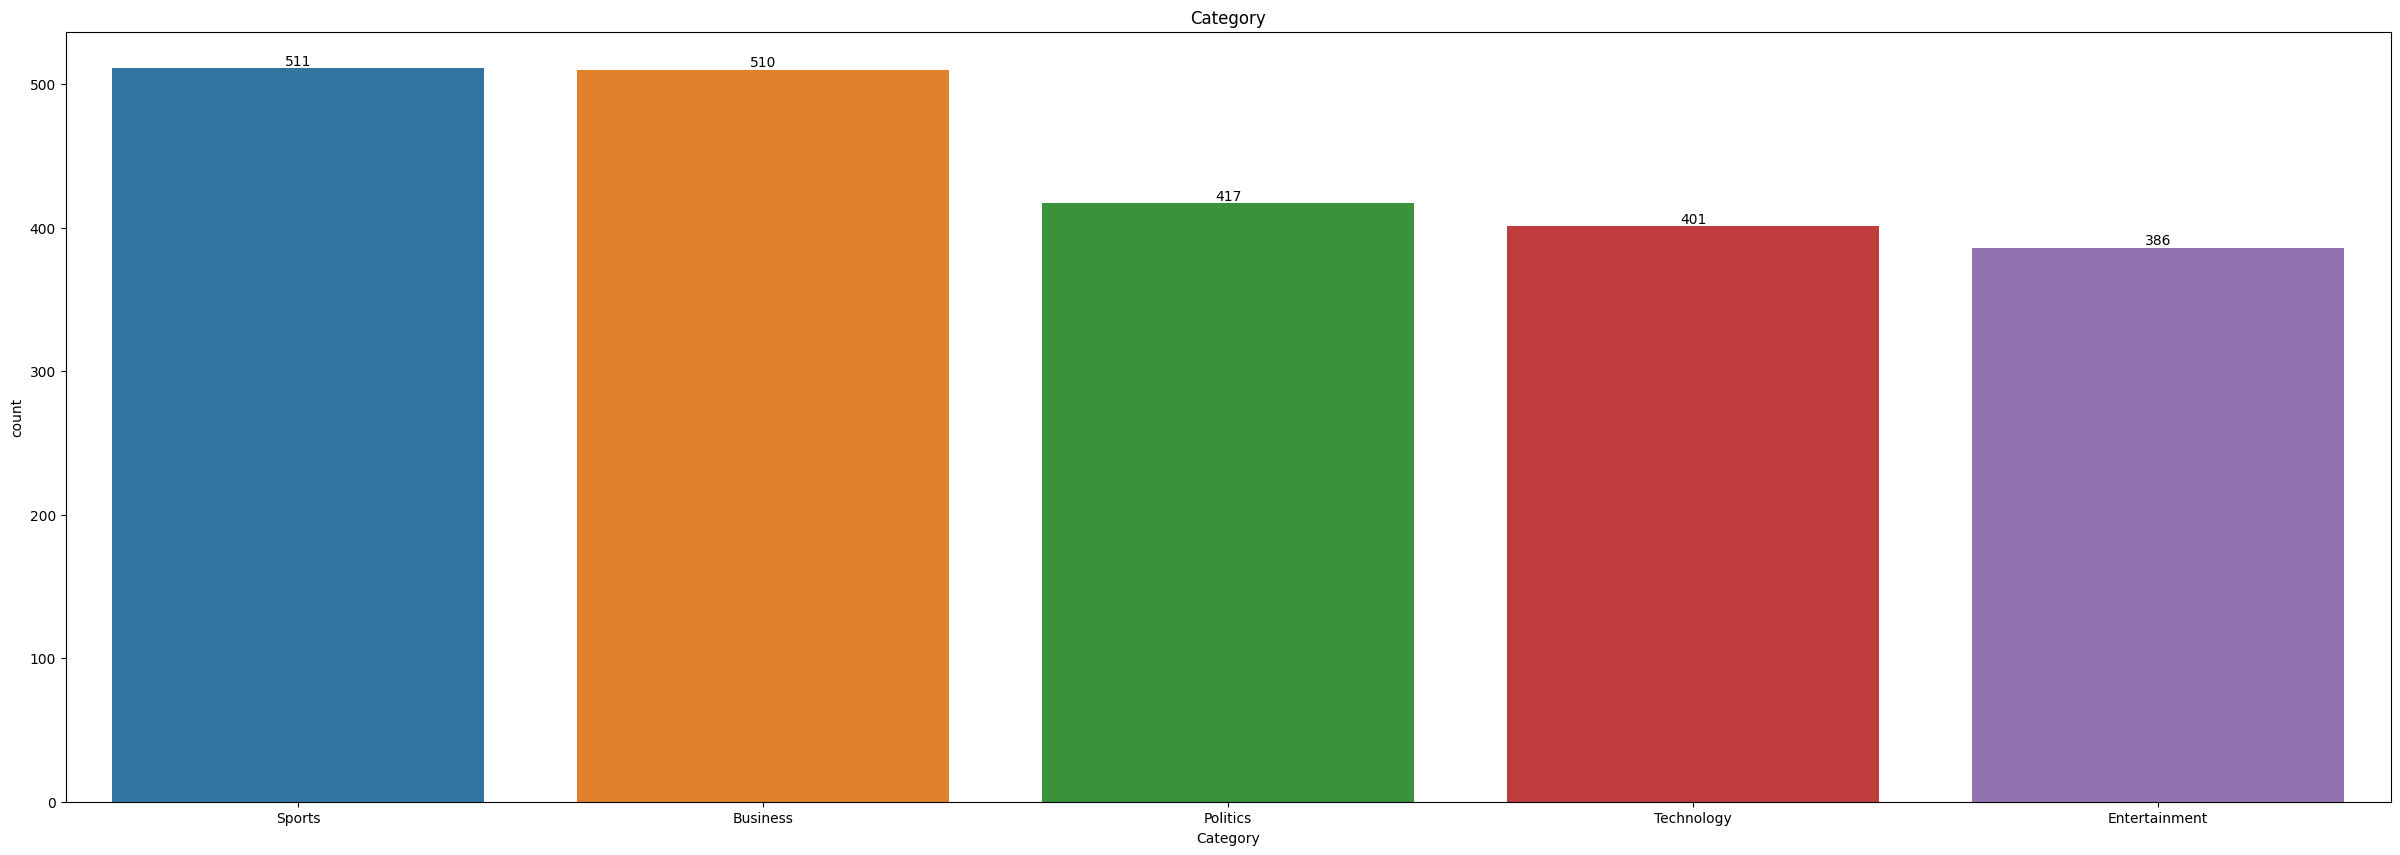

In [15]:
plt.figure(figsize=(30,10))
ax = sns.countplot(data = df,
              x = 'Category',
              order = df['Category'].value_counts().index[:], linewidth=0.3)
ax.bar_label(ax.containers[0])
plt.title('Category')
plt.show()

Labels in the dataset:  ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics']
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64


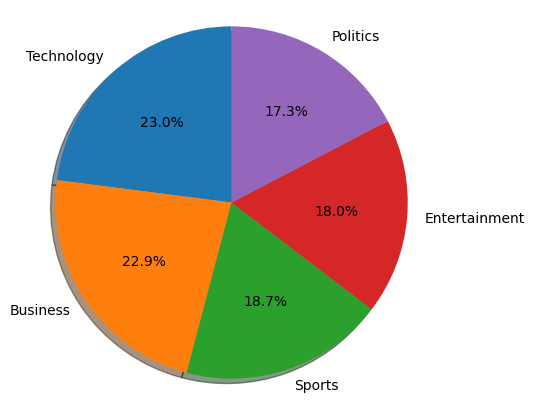

In [20]:
# Check tweets distribution
def pie_chart(dataframe):
  # Converting pd object to list of string
  label_types  = dataframe.Category.unique().astype(str)
  # Count tweets for each label
  label_counts = dataframe.Category.value_counts()
  print('Labels in the dataset: ', label_types)
  print(label_counts)
  # labels for the two classes
  labels = label_types #'Positives', 'Negative'
  # Sizes for each slide
  sizes = [count for count in label_counts]
  # Declare a figure with a custom size
  fig = plt.figure(figsize=(5, 5))
  # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
  plt.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.axis('equal')
  # Display the chart
  plt.show()

pie_chart(df)

# Preprocessing of Data

The data is preprocessed, in NLP it is also known as text normalization. Some of the most common methods of text normalization are

* Removing non-letters
* Removing Stopwords
* Tokenization
* Lemmatization



In [50]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
def process_text(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    #remove numbers
    pattern = r'[0-9]'
    text = re.sub(pattern, '', text)
    # remove hyperlinks
    text = re.sub(r'https?://[^\s\n\r]+', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    # tokenize tweets
    text_tokens = word_tokenize(text)

    text_clean = []
    for word in text_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # stemming word
            text_clean.append(lemma_word)

    return " ".join(text_clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df['Processed_Article'] =df['Article'].apply(process_text)

**Artcile Before PreProcessing**

In [118]:
df['Article'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

**Article After PreProcessing**

In [119]:
df['Processed_Article'][0]

'tv future hand viewer home theatre system plasma high-definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked-about technology ce digital personal video recorder dvr pvr set-top box like u tivo uk sky+ system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built-in high-definition tv set big business japan u slower take europe lack high-definition programming people forward wind advert also forget abiding network channel schedule putting together a-la-carte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loya

**Encoding the target variable**

In [58]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Encoded_Category']=label_encoder.fit_transform(df['Category'])

**Create an option for the user to choose between Bag of Words and TF-IDF techniques for vectorizing the data.**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_type = input("Choose a vectorizer (Bag of Words - 'bow' or TF-IDF - 'tfidf'):")
if vectorizer_type == 'bow':
  vectorizer= CountVectorizer()
  print("You Have Choosed BOW")
elif vectorizer_type == 'tfidf':
  vectorizer= TfidfVectorizer()
  print("You Have Choosed TF-IDF")
else:
  print("Invalid Choice,By Default: TF-IDF")
  vectorizer= TfidfVectorizer()

X=vectorizer.fit_transform(df['Processed_Article'])
y=df['Encoded_Category']


Choose a vectorizer (Bag of Words - 'bow' or TF-IDF - 'tfidf'):tfidf
You Have Choosed TF-IDF


**Train-Test split**

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Model Training and Evaluation with Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB(alpha=0.16)
naive_bayes.fit(X_train,y_train)
naive_bayes_prediction=naive_bayes.predict(X_test)

In [70]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def eval_model(y_test,naive_bayes_prediction):
	print("F1 score of the model:",f1_score(y_test,naive_bayes_prediction,average='micro'))
	print("Naive Bayes Accuracy:",accuracy_score(y_test,naive_bayes_prediction))
	print("Naive Bayes Classification Report:")
	print(classification_report(y_test,naive_bayes_prediction))
	print("Naive Bayes Confusion Matrix:")
	print(confusion_matrix(y_test,naive_bayes_prediction))

In [87]:
#Evaluation
eval_model(y_test,naive_bayes_prediction)

F1 score of the model: 0.9730700179533214
Naive Bayes Accuracy: 0.9730700179533214
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       1.00      0.93      0.96        96
           2       0.92      0.99      0.96        98
           3       0.99      1.00      1.00       124
           4       0.96      0.99      0.98       103

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

Naive Bayes Confusion Matrix:
[[130   0   5   0   1]
 [  1  89   3   0   3]
 [  1   0  97   0   0]
 [  0   0   0 124   0]
 [  0   0   0   1 102]]


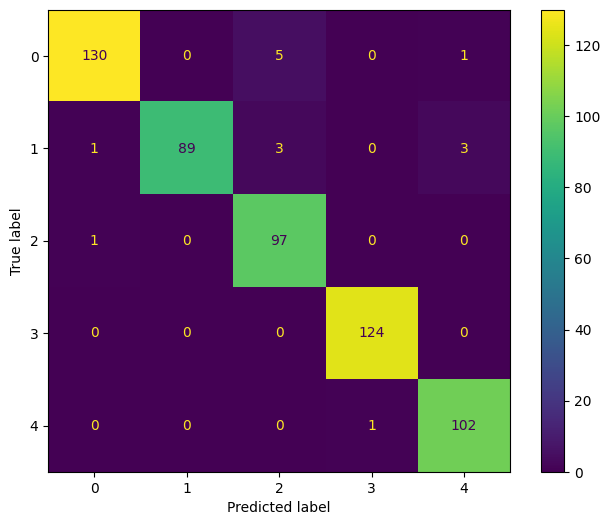

In [84]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
def confusion_matrix_display(conf_matrix):
  display = ConfusionMatrixDisplay(conf_matrix, display_labels=naive_bayes.classes_)
  fig, ax = plt.subplots(figsize=(8,6), dpi=100)
  display.plot(ax=ax);

confusion_matrix_display(confusion_matrix(y_test,naive_bayes_prediction))

# Model Training and Evaluation with Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_pred=DT.predict(X_test)

In [93]:
#Evaluation
eval_model(y_test,DT_pred)

F1 score of the model: 0.8384201077199281
Naive Bayes Accuracy: 0.8384201077199281
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       136
           1       0.87      0.81      0.84        96
           2       0.78      0.87      0.82        98
           3       0.93      0.91      0.92       124
           4       0.79      0.81      0.80       103

    accuracy                           0.84       557
   macro avg       0.84      0.84      0.84       557
weighted avg       0.84      0.84      0.84       557

Naive Bayes Confusion Matrix:
[[108   3  12   3  10]
 [  4  78   4   4   6]
 [  8   2  85   0   3]
 [  4   2   2 113   3]
 [  8   5   6   1  83]]


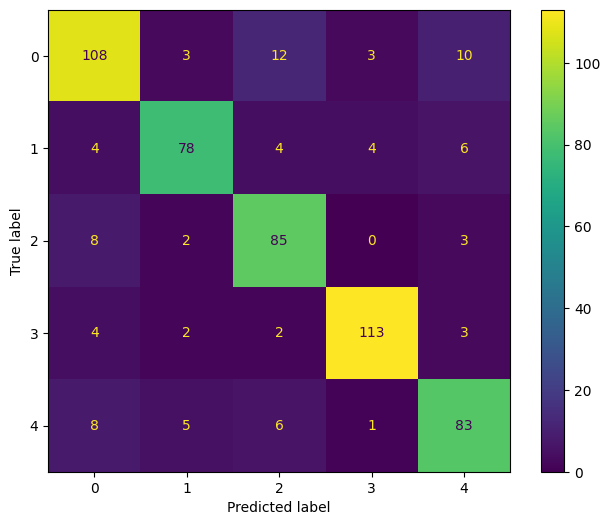

In [94]:
confusion_matrix_display(confusion_matrix(y_test,DT_pred))

# Model Training and Evaluation with Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred=KNN.predict(X_test)

In [100]:
#Evaluation
eval_model(y_test,KNN_pred)

F1 score of the model: 0.9371633752244165
Naive Bayes Accuracy: 0.9371633752244165
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       136
           1       0.95      0.94      0.94        96
           2       0.86      0.91      0.88        98
           3       0.96      1.00      0.98       124
           4       0.97      0.96      0.97       103

    accuracy                           0.94       557
   macro avg       0.94      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557

Naive Bayes Confusion Matrix:
[[120   1  12   3   0]
 [  1  90   2   1   2]
 [  6   1  89   1   1]
 [  0   0   0 124   0]
 [  0   3   1   0  99]]


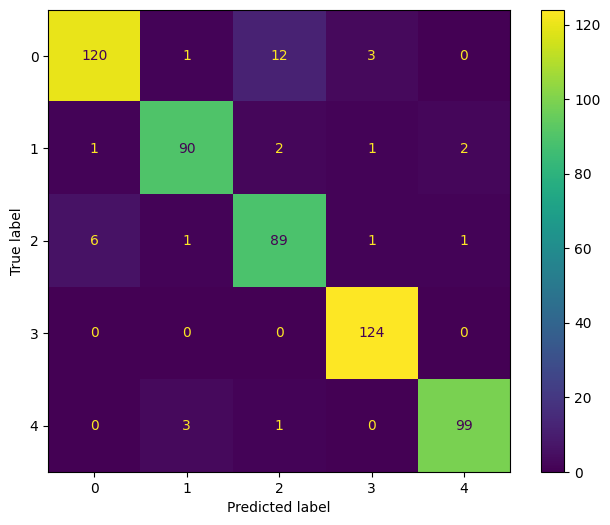

In [102]:
confusion_matrix_display(confusion_matrix(y_test,KNN_pred))

Model Training and Evaluation with Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest_pred=random_forest.predict(X_test)

In [101]:
#Evaluation
eval_model(y_test,random_forest_pred)

F1 score of the model: 0.9515260323159784
Naive Bayes Accuracy: 0.9515260323159784
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       136
           1       0.99      0.92      0.95        96
           2       0.96      0.94      0.95        98
           3       0.97      1.00      0.98       124
           4       0.97      0.92      0.95       103

    accuracy                           0.95       557
   macro avg       0.96      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557

Naive Bayes Confusion Matrix:
[[131   0   4   0   1]
 [  5  88   0   1   2]
 [  6   0  92   0   0]
 [  0   0   0 124   0]
 [  4   1   0   3  95]]


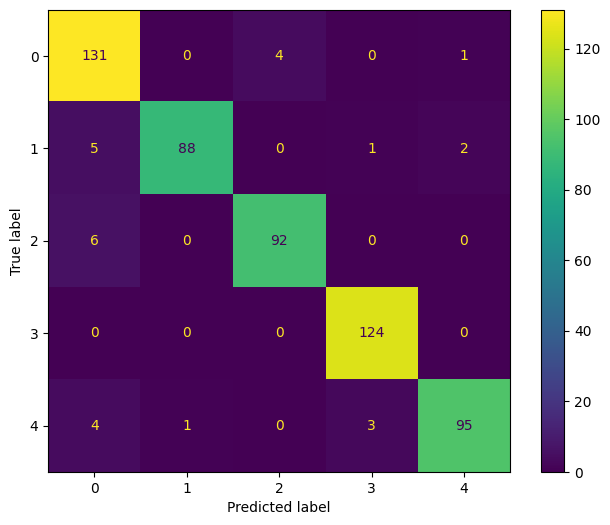

In [103]:
confusion_matrix_display(confusion_matrix(y_test,random_forest_pred))

# Comparison of Accuracies of Different Models

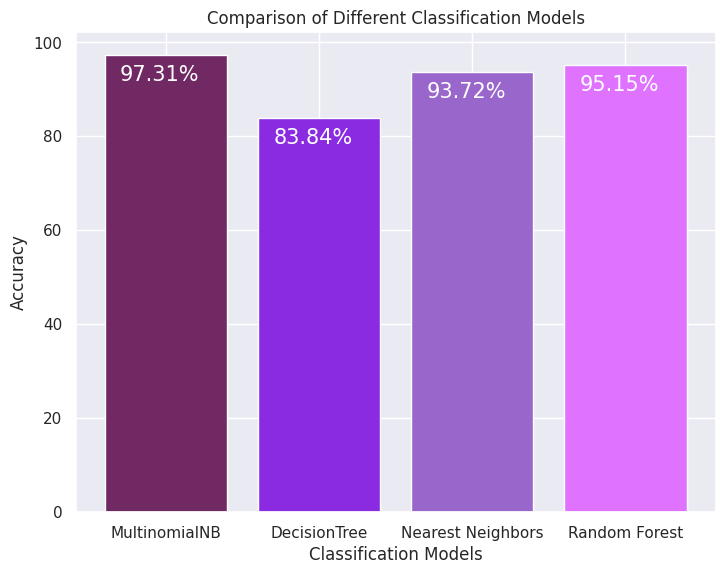

In [104]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a=round(accuracy_score(y_test,naive_bayes_prediction)*100,3)
b=round(accuracy_score(y_test,DT_pred)*100,3)
c=round(accuracy_score(y_test,KNN_pred)*100,3)
d=round(accuracy_score(y_test,random_forest_pred)*100,3)
Models = ['MultinomialNB', 'DecisionTree', 'Nearest Neighbors', 'Random Forest']
Accuracy=[a,b,c,d]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

# Questionnaire:

**1.How many news articles are present in the dataset that we have?**

In [105]:
print(df.shape[0])

2225


**2.Most of the news articles are from _____ category?**

In [108]:
most_common_category=df['Category'].value_counts().idxmax()
most_common_category

'Sports'

**3. Only ___ no. of articles belong to the ‘Technology’ category?**

In [109]:
Technology_count=df['Category'].value_counts()['Technology']
Technology_count

401

**4.What are Stop Words and why should they be removed from the text data?**

**Ans:** Stop words are basically a set of commonly used words in any language. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead which are meaningfull for analysis.

**5.Explain the difference between Stemming and Lemmatization?**

**Ans:**
Stemming and lemmatization are techniques used in natural language processing for wordnormalization.

* **Stemming** reduces words to their base or root form by removing suffi xes and prefi xes. For example,"running" would be stemmed to "run".

* **Lemmatization**, on the other hand, also reduces words to their base form, but it considers the contextand part of speech (POS) of the word.
For example, "running" would be lemmatized to "run", and  "better" would be lemmatized to "good".

**6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**

**Ans:**
* The choice between Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency) depends on the specifi c task and dataset.
* BoW represents the occurrence of words in a documentwithout considering their importance,
while TF-IDF gives higher weight to words that are more relevant to a specific document in a corpus.
* TF-IDF is generally considered more effi cient for text classifi cationtasks.

**7. What’s the shape of train & test data sets after performing a 75:25 split?**


In [110]:
print(X_train.shape[0])

1668


**8.Which of the following is found to be the best performing model?**

In [117]:
def MAX_Accuracy():
  naive_bayes=round(accuracy_score(y_test,naive_bayes_prediction)*100,3)
  DT=round(accuracy_score(y_test,DT_pred)*100,3)
  KNN=round(accuracy_score(y_test,KNN_pred)*100,3)
  Random_Forest=round(accuracy_score(y_test,random_forest_pred)*100,3)
  max_dict = {'Naive Bayes':naive_bayes, 'Decision Tree':DT, 'Nearest Neighbors':KNN, 'Random Forest':Random_Forest}
  best_performer=max(max_dict, key=max_dict.get)
  max_accuracy=max(naive_bayes,DT,KNN,Random_Forest)
  print("Best Performer is:", best_performer, "with Accuracy of:", round(max_accuracy,2),'%')

MAX_Accuracy()

Best Performer is: Naive Bayes with Accuracy of: 97.31 %


**9.According to this particular use case, both precision and recall are equally important. (T/F)?**

**Ans:**

Yes,

News article classification involves categorizing news articles into different topics or classes, such as politics, sports, technology, or entertainment. In such scenarios, both precision and recall play crucial roles in assessing the performance of the classification model.

# Insights:

* The dataset contains news articles from various categories such as Technology, Business, Sports,Entertainment, Politics, etc
* The number of news articles in each category Varies, and the distribution ofarticles across categories is not balanced.
* Two popular techniques,Bag of Words (BoW) and TF-IDF, have been implemented for vectorizing the textual data
* Best Performer is: Naive Bayes with Accuracy of: 97.31 % with TF-IDF Vectorizer
* Exploring more advanced natural language processing techniques like word embeddings(e.g., Word2Vec or GloVe) or deep learning models (e.g., recurrent neural networks or transformers) could potentially improve the
classification results